In [33]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

## User input

In [34]:
filename_prefix = 'E:\\Ashlee\\PacBio\\181207\\30s_43N43\\m181207_211324_42131_c000468682559900001500000112312060_s1_p0'

frame_rate = 0.1 #seconds
colors = [(0, 1, 0), 'green', 'orange', 'red']

## Load data

In [35]:
trc_filename = filename_prefix + '.trc.h5'
mcd_filename = filename_prefix + '.mcd.h5'
upd_filename = filename_prefix + '.upd.h5'
meta_filename = filename_prefix + '.metadata'

trc_file = h5py.File(trc_filename, 'r')
mcd_file = h5py.File(mcd_filename, 'r')
upd_file = h5py.File(upd_filename, 'r')

# Load data in trace file
dset = trc_file['TraceData']
traces = dset['Traces']
decode = dset['Codec']['Decode']
n_traces = traces.shape[0]
n_frames = traces.shape[2]

# Load data in mcd file

time_axis = np.arange(n_frames)*frame_rate

In [186]:
def printname(name):
    print(name)

print('In mcd file: ')
mcd_file.visit(printname)
print()

print('In upd file: ')
upd_file.visit(printname)

In mcd file: 
Diagnostics
Diagnostics/Camera[0]
Diagnostics/Camera[0]/PreFL
Diagnostics/Camera[0]/PreIllumination
Diagnostics/Camera[1]
Diagnostics/Camera[1]/PreFL
Diagnostics/Camera[1]/PreIllumination
Diagnostics/Camera[2]
Diagnostics/Camera[2]/PreFL
Diagnostics/Camera[2]/PreIllumination
Diagnostics/Camera[3]
Diagnostics/Camera[3]/PreFL
Diagnostics/Camera[3]/PreIllumination
EventsData
EventsData/EventFrames
EventsData/Events
FL
FL/Camera[0]
FL/Camera[1]
FL/Camera[2]
FL/Camera[3]
FrameJobLog
FrameJobLog/Camera[0]
FrameJobLog/Camera[1]
FrameJobLog/Camera[2]
FrameJobLog/Camera[3]
MovieCal
MovieCal/ActiveChipLooks
MovieCal/Camera[0]
MovieCal/Camera[0]/CameraLut
MovieCal/Camera[0]/FixedPattern
MovieCal/Camera[0]/FlatField
MovieCal/Camera[0]/GridLocations
MovieCal/Camera[0]/HoleCentroids
MovieCal/Camera[0]/HoleCoordinates
MovieCal/Camera[0]/HolePhaseDivergence
MovieCal/Camera[0]/Psf
MovieCal/Camera[0]/ReadVariance
MovieCal/Camera[0]/Variance
MovieCal/Camera[1]
MovieCal/Camera[1]/CameraLut
M

In [170]:
upd_TD = upd_file['TraceData']

hole_xy_plot = upd_TD['HoleXYPlot']
hole_status = upd_TD['HoleStatus']

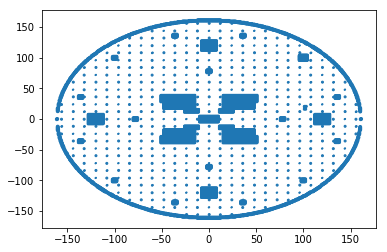

In [126]:
plt.scatter(hole_xy_plot[:, 0], hole_xy_plot[:, 1], hole_status)

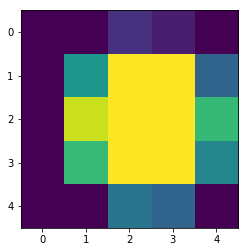

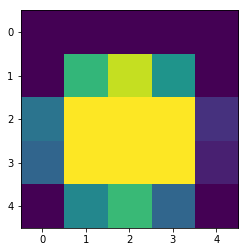

In [192]:
psf = mcd_file['MovieCal']['Camera[0]']['Psf']
for i in range(1, 3):
    fig, ax = plt.subplots()
    im = ax.imshow(psf[0, i, :, :])

In [193]:
decode.shape

(256,)

In [195]:
decode_array = np.array(decode)

## Plot intensity distributions

In [196]:
avg_intens = np.mean(traces, axis=2) # not decoded

Text(0,0.5,'Count')

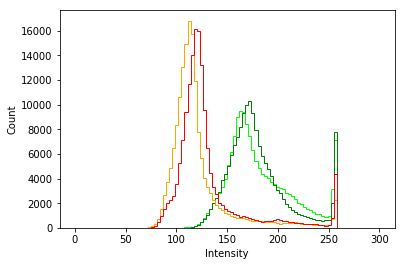

In [197]:
for i in range(4):
    plt.hist(avg_intens.T[i], bins=100, range=[0, 300], histtype='step', color=colors[i])
    
plt.xlabel('Intensity')
plt.ylabel('Count')

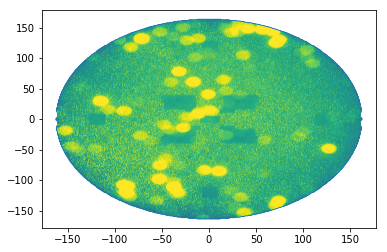

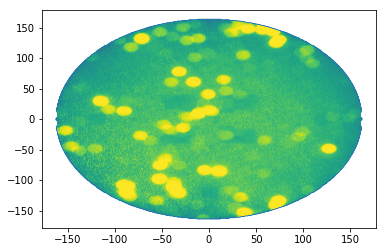

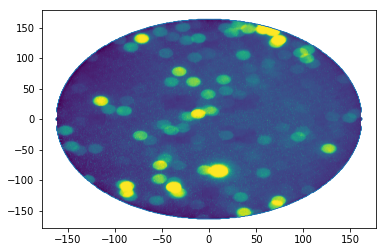

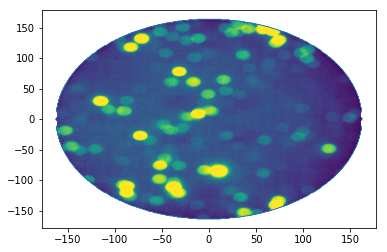

In [185]:
for i in range(4):
    plt.figure()
    plt.scatter(hole_xy_plot[:, 0], hole_xy_plot[:, 1], hole_status)
    plt.scatter(hole_xy_plot[:, 0], hole_xy_plot[:, 1], 1, avg_intens.T[i]/300)
    plt.show()

## View a trace

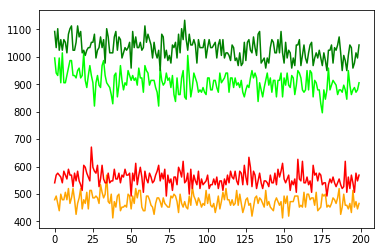

In [198]:
#i = 112542 # is a good example
i = np.random.randint(0, 163481)
trace = traces[i]

for i in range(4):
    decoded_trace = decode_array[trace[i]]
    plt.plot(decoded_trace, color=colors[i])
    i += 1 

## Plot average intensity over time for each color

In [ ]:
avg_trace = np.zeros((4, 200))
for i in range(4):
    avg_trace[i] = np.mean(traces[:][:][i], axis=0)

In [ ]:
for i in range(4):
    plt.plot(time_axis, avg_trace[i], color=colors[i])

plt.xlabel('Time (s)')
plt.ylabel('Intensity')